## Final Project.ipynb



### Preliminaries

This code builds cross-sectional portfolio strategies and produces relevant analytics.
- As always, the data can be found in the dropbox folder: https://www.dropbox.com/scl/fo/hrjspow2cpstfnoeqb23v/h?rlkey=j4fohf1s4e6fdy49p7bs71b7l&dl=0.
- Please download the file `MasterData_small.parquet`. 

In [5]:
import qpm_download
import qpm
import pandas as pd
import numpy as np
import wrds
import statsmodels.api as sm

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

We now choose whether to import data directly from WRDS (`import_data` = True) or to load data from dropbox (`import_data` = False). If you choose to load data from dropbox, make sure to define the data directoy (`_DATA_DIR`). Also, define a directory where you'd like to store the strategy returns (`_STRATEGY_DIR`). In future versions, we'll use a much larger data set, named `MasterData.parquet` (it is already in dropbox), but the core strategies will be constructed using `MasterData_small.parquet`. 

In [4]:
import_data = False             # <-- Edit this line
_DATA_DIR = 'C:/Users/Zixian Li/Documents/Booth/Academic/Fall 2023/Quant PM/Week Three/Data'           # <-- Edit this line
_STRATEGY_DIR = 'C:/Users/Zixian Li/Documents/Booth/Academic/Fall 2023/Quant PM/Week Three/Strategy'   # <-- Edit this line

In [ ]:
   _SORT_FREQUENCY = 'June'        # Either "Monthly" or "June"
_REMOVE_MICRO_CAPS = False      # Either "True" or "False"
_SAMPLE_START = '2010-01-01'
_SAMPLE_END = '2023-07-31'
_NUM_PORT = 5

## Only using Intangible Asset as a signal

In [117]:
if import_data == True:

    df_full = qpm_download.cross_section_compact(_SAMPLE_START, _SAMPLE_END, _STRATEGY_NAME, signal_variables)
    
if import_data == False:
    
    df_full = qpm.load_data(data_dir = _DATA_DIR, file_name = 'MasterData.parquet')


> Loading Raw Data...
> Renaming key variables...
> Dropping duplicates...
> Creating Auxiliary Variables...


In [121]:
#Build the signal

df_full['signal'] = df_full['intan'] / df_full['at']

In [122]:
df_full['signal'] = qpm.create_lag(df_full, var_name = 'signal', lag = 1)

df = qpm.select_sample(df_full, sample_start = _SAMPLE_START, sample_end = _SAMPLE_END, remove_micro_caps = _REMOVE_MICRO_CAPS)
df, df_rets = qpm.create_portfolios(df, sort_frequency = _SORT_FREQUENCY, num_port = _NUM_PORT)

> Selecting Sample for Given Criteria...
> Sorting stocks into 5 portfolios at frequency: June...
> Computing returns using various weights...


> Merging strategy returns with Fama and French factor returns...


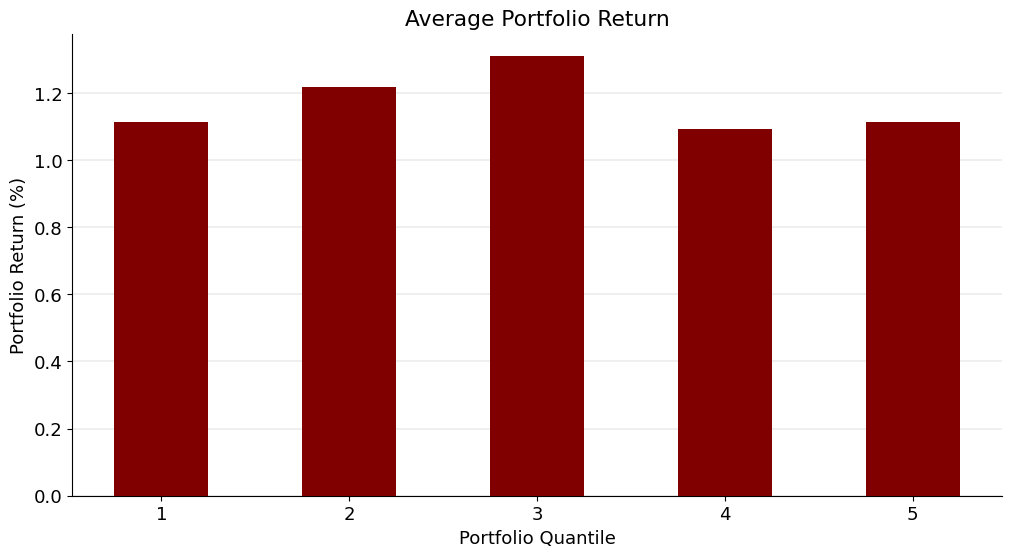

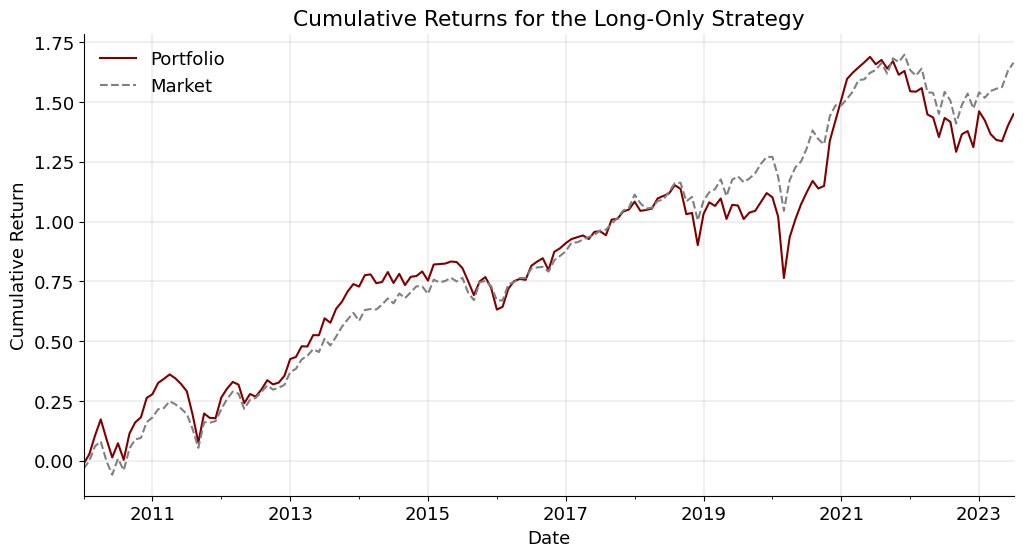

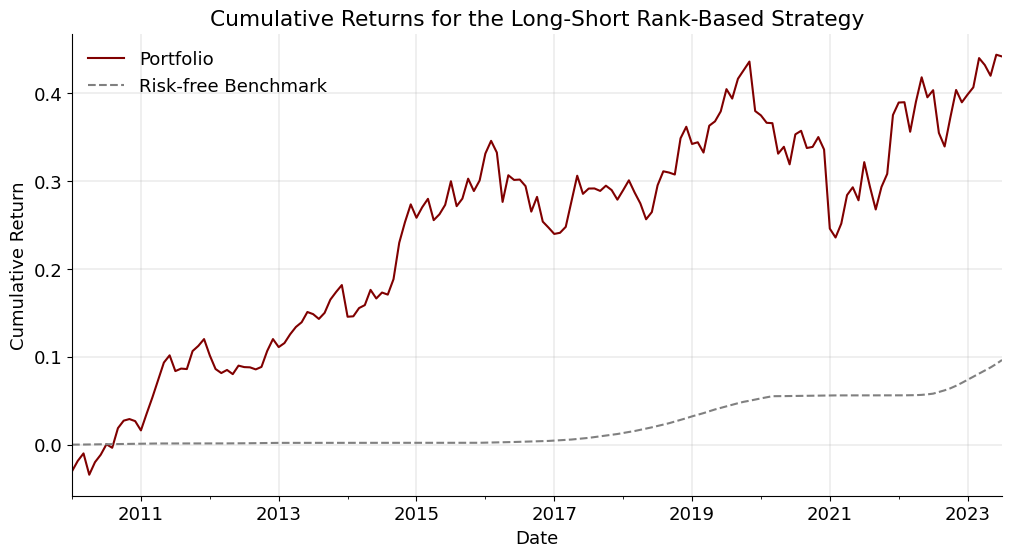

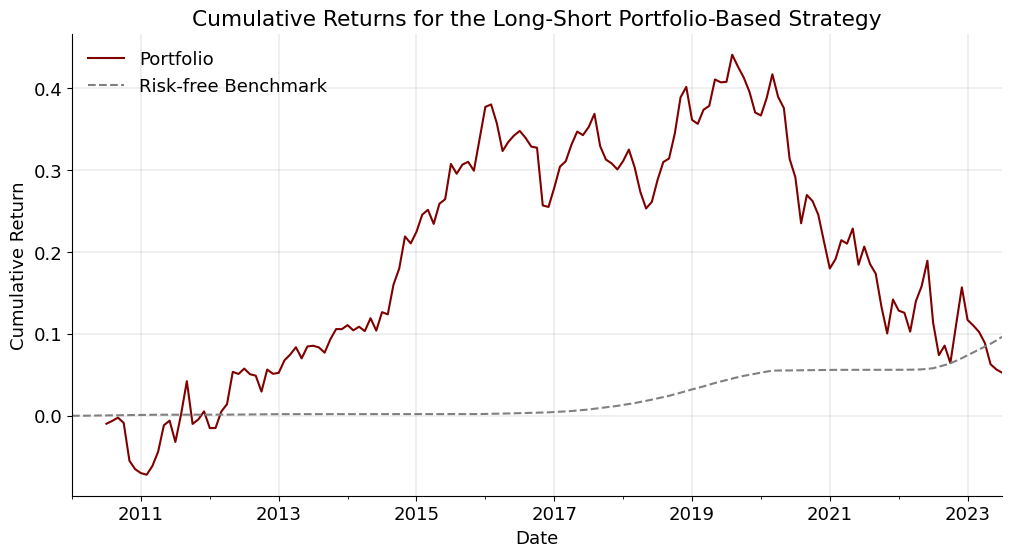

In [123]:
qpm.analyze_strategy(df_rets, analysis_type = 'Performance')

In [183]:
if import_data == True:

    df_full = qpm_download.cross_section_compact(_SAMPLE_START, _SAMPLE_END, _STRATEGY_NAME, signal_variables)
    
if import_data == False:
    
    df_full = qpm.load_data(data_dir = _DATA_DIR, file_name = 'MasterData.parquet')

> Loading Raw Data...
> Renaming key variables...
> Dropping duplicates...
> Creating Auxiliary Variables...


In [184]:
df_full['intangible'] = df_full['intan'] / df_full['at']
yearly_stats = df_full.groupby('fyear')['intangible'].agg(['mean', 'std']).reset_index()

# Step 3: Merge these stats back into the original dataframe
df_full = df_full.merge(yearly_stats, on='fyear', suffixes=('', '_intan_yearly'))

# Step 4: Calculate the normalized profitability signal
df_full['intan_signal'] = (df_full['intangible'] - df_full['mean']) / df_full['std']

In [185]:
df_full['value'] = df_full['be'] / df_full['me']
yearly_stats = df_full.groupby('fyear')['value'].agg(['mean', 'std']).reset_index()

# Step 3: Merge these stats back into the original dataframe
df_full = df_full.merge(yearly_stats, on='fyear', suffixes=('', '_value_yearly'))

# Step 4: Calculate the normalized profitability signal
df_full['value_signal'] = (df_full['value'] - df_full['mean_value_yearly']) / df_full['std_value_yearly']

In [170]:
df_full['signal'] = 0.5*df_full['intan_signal']+0.3*df_full['value_signal']

> Selecting Sample for Given Criteria...
> Sorting stocks into 5 portfolios at frequency: June...
> Computing returns using various weights...
> Merging strategy returns with Fama and French factor returns...


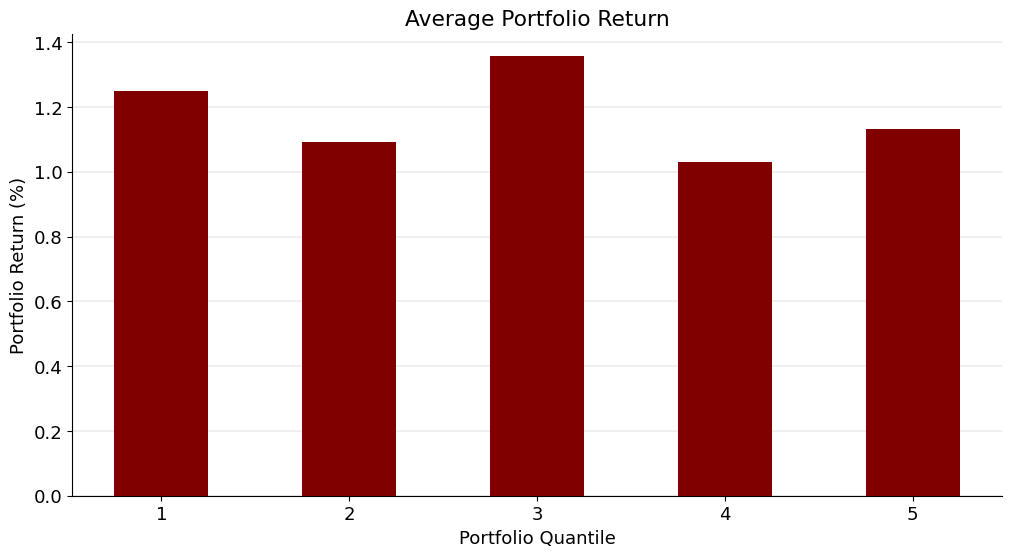

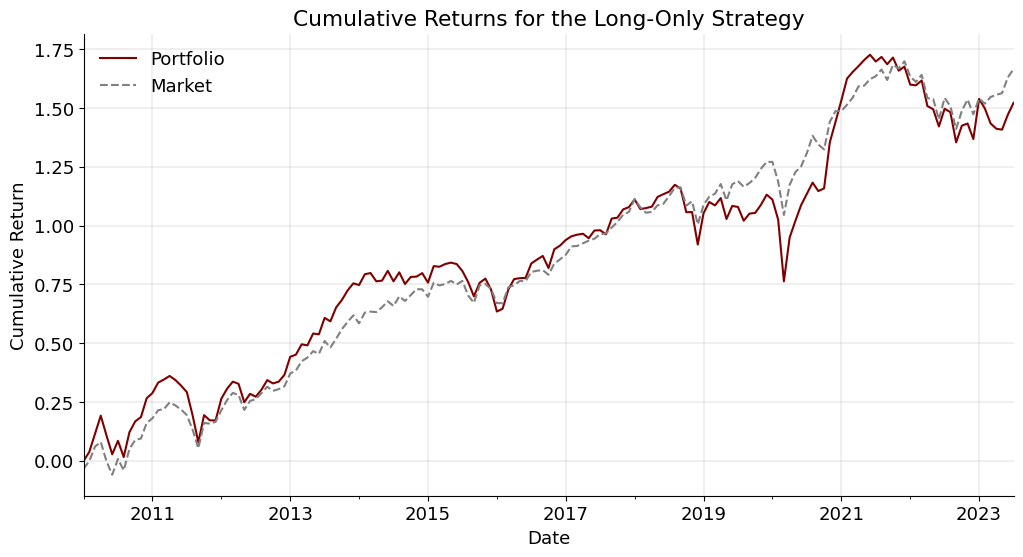

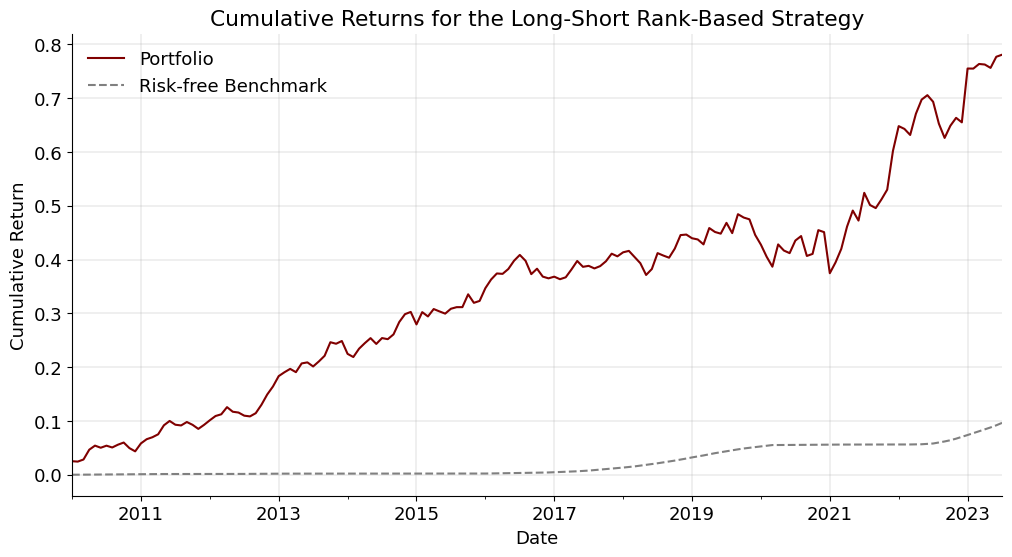

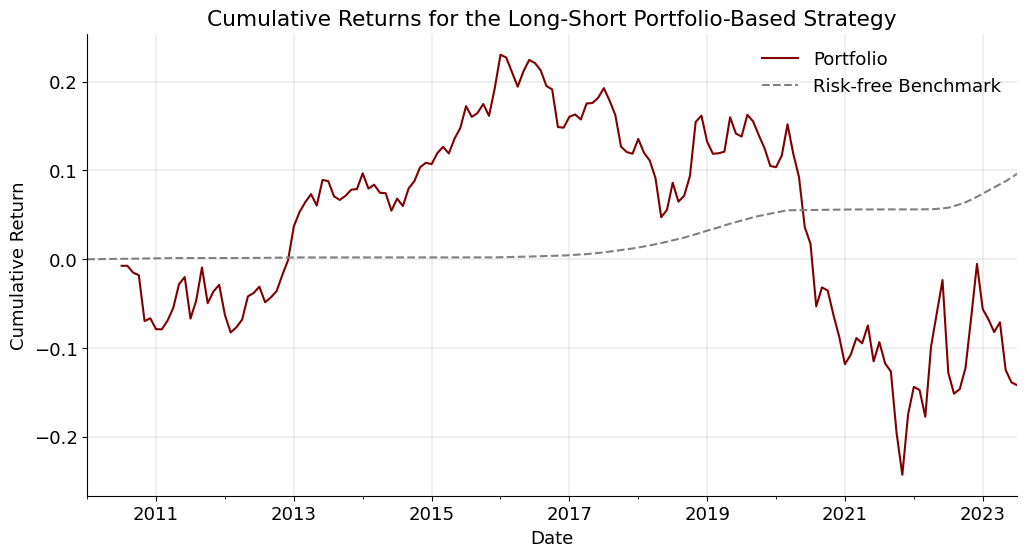

In [171]:
df_full['signal'] = qpm.create_lag(df_full, var_name = 'signal', lag = 1)

df = qpm.select_sample(df_full, sample_start = _SAMPLE_START, sample_end = _SAMPLE_END, remove_micro_caps = _REMOVE_MICRO_CAPS)
df, df_rets = qpm.create_portfolios(df, sort_frequency = _SORT_FREQUENCY, num_port = _NUM_PORT)
qpm.analyze_strategy(df_rets, analysis_type = 'Performance')

In [186]:
df_full['rnd']=df_full['xrd']/df_full['oancf']
early_stats = df_full.groupby('fyear')['rnd'].agg(['mean', 'std']).reset_index()

# Step 3: Merge these stats back into the original dataframe
df_full = df_full.merge(yearly_stats, on='fyear', suffixes=('', '_rnd_yearly'))

# Step 4: Calculate the normalized profitability signal
df_full['rnd_signal'] = (df_full['rnd'] - df_full['mean_rnd_yearly']) / df_full['std_rnd_yearly']

In [191]:
df_full['signal'] = 0.2*df_full['intan_signal']+0.3*df_full['value_signal']+0.5*df_full['rnd_signal']

> Selecting Sample for Given Criteria...
> Sorting stocks into 5 portfolios at frequency: June...
> Computing returns using various weights...
> Merging strategy returns with Fama and French factor returns...


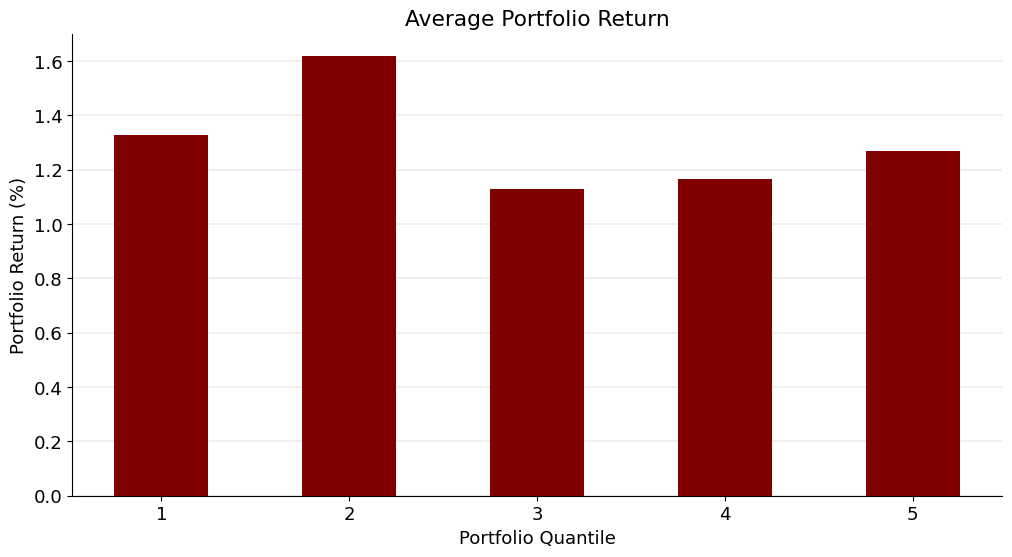

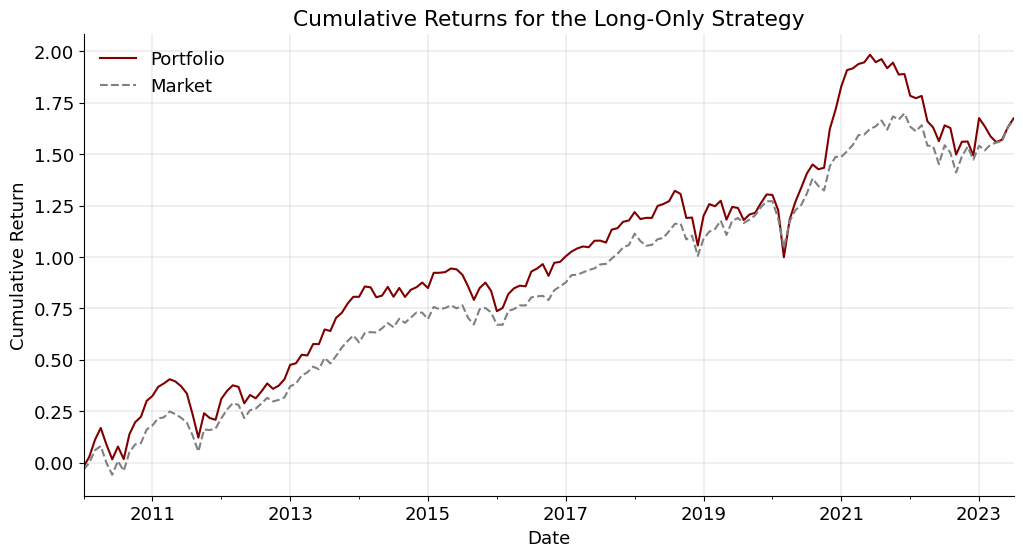

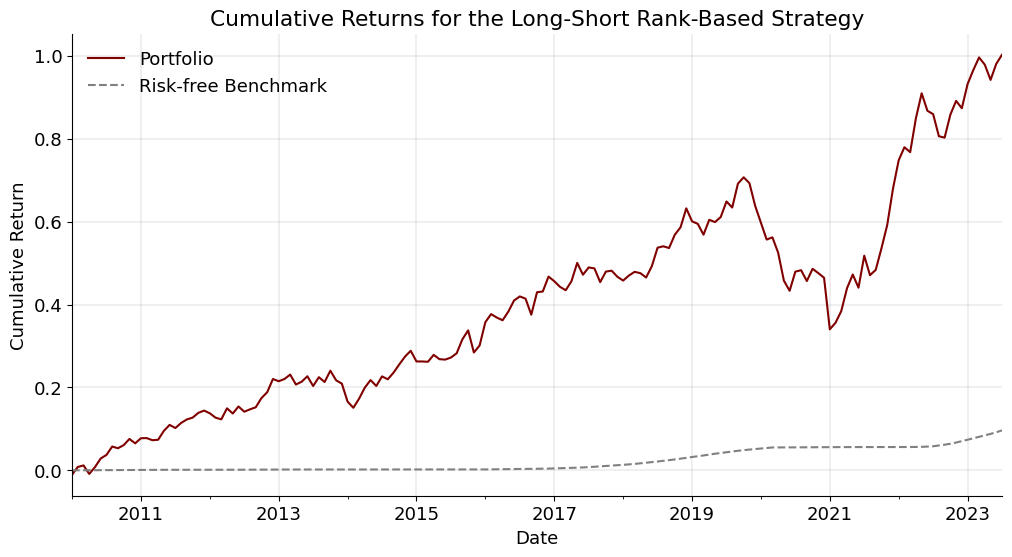

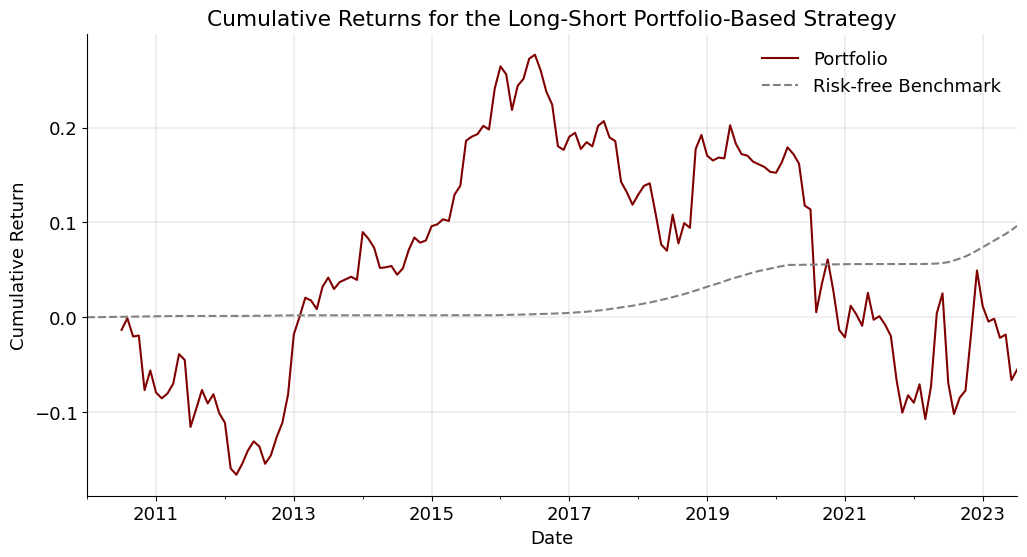

In [192]:

df_full['signal'] = qpm.create_lag(df_full, var_name = 'signal', lag = 1)
df = qpm.select_sample(df_full, sample_start = _SAMPLE_START, sample_end = _SAMPLE_END, remove_micro_caps = _REMOVE_MICRO_CAPS)
df, df_rets = qpm.create_portfolios(df, sort_frequency = _SORT_FREQUENCY, num_port = _NUM_PORT)
qpm.analyze_strategy(df_rets, analysis_type = 'Performance')

In [193]:
qpm.analyze_strategy(df_rets, analysis_type = 'Summary')

> Merging strategy returns with Fama and French factor returns...
                     count      mean       std       min       25%       50%  \
retP_rank_longonly   163.0  0.012107  0.060196 -0.205219 -0.017811  0.012627   
retP_rank_longshort  163.0  0.006017  0.029693 -0.117117 -0.010615  0.005610   
retF_vw              157.0 -0.000598  0.027053 -0.102857 -0.012006 -0.000628   
mktrf                163.0  0.010645  0.044144 -0.133900 -0.014000  0.013600   
smb                  163.0  0.000020  0.025947 -0.082800 -0.018000  0.001400   
hml                  163.0 -0.001521  0.033219 -0.138700 -0.018800 -0.004200   

                          75%       max  
retP_rank_longonly   0.044701  0.207357  
retP_rank_longshort  0.021763  0.091282  
retF_vw              0.013674  0.084961  
mktrf                0.034650  0.136500  
smb                  0.016100  0.071100  
hml                  0.013350  0.127500  


In [194]:
qpm.analyze_strategy(df_rets, analysis_type = 'Factor Regression')

> Merging strategy returns with Fama and French factor returns...

---------------------------------------------------------------
> Running Factor Regressions: Table 1  - 3 Fama-French Factors
---------------------------------------------------------------

                  (1)        (2)       (3)       (4)        (5)        (6)    
------------------------------------------------------------------------------
const          0.0018     -0.0022   0.0067*** 0.0019     0.0001     0.0061*** 
               (0.0021)   (0.0022)  (0.0025)  (0.0021)   (0.0013)   (0.0021)  
mktrf          -0.2105*** 1.2289*** -0.0580   -0.1985*** 1.0385***  0.0399    
               (0.0468)   (0.0496)  (0.0551)  (0.0497)   (0.0314)   (0.0498)  
hml                                           0.1322**   -0.1374*** 0.4163*** 
                                              (0.0630)   (0.0399)   (0.0632)  
smb                                           -0.0801    0.9289***  -0.5376***
                              

In [ ]:
if _REMOVE_MICRO_CAPS:
    save_dir = '%s/StrategyReturns_%s_%s_noMicroCaps.csv' %(_STRATEGY_DIR, _STRATEGY_NAME, _SORT_FREQUENCY)
else:
    save_dir = '%s/StrategyReturns_%s_%s_withMicroCaps.csv' %(_STRATEGY_DIR, _STRATEGY_NAME, _SORT_FREQUENCY)

df_rets.to_csv(save_dir)
print('Saved Strategy Returns to %s' %(save_dir))